<a href="https://colab.research.google.com/github/cod3astro/intro_To_Bioinformatics/blob/main/GDS3915_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install GEOparse

In [33]:
with open("GDS3915_full.soft") as f:
    for i, line in enumerate(f):
        print(line.strip())
        if i == 110:
            break

import GEOparse

^DATABASE = Geo
!Database_name = Gene Expression Omnibus (GEO)
!Database_institute = NCBI NLM NIH
!Database_web_link = http://www.ncbi.nlm.nih.gov/geo
!Database_email = geo@ncbi.nlm.nih.gov
!Database_ref = Nucleic Acids Res. 2005 Jan 1;33 Database Issue:D562-6
^DATASET = GDS3915
!dataset_title = Aging and cognitive decline: hippocampus
!dataset_description = Analysis of hippocampi from F344 males, at 5 age points across the adult lifespan, tested on the Morris water maze (MWM) task.  MWM is a dorsal hippocampal-dependent, spatial memory task. MWM performance showed an age effect. Results provide insight into the molecular basis of cognitive aging.
!dataset_type = Expression profiling by array
!dataset_pubmed_id = 19211887
!dataset_platform = GPL341
!dataset_platform_organism = Rattus norvegicus
!dataset_platform_technology_type = in situ oligonucleotide
!dataset_feature_count = 15923
!dataset_sample_organism = Rattus norvegicus
!dataset_sample_type = RNA
!dataset_channel_count = 1
!dat

In [34]:
gds = GEOparse.get_GEO(filepath='GDS3915_full.soft')
gds_table = gds.table
df = gds_table.copy()
drop_columns = df.columns[51:]
df = df.drop(columns=drop_columns)
df.head()

11-Oct-2025 17:09:14 INFO GEOparse - Parsing GDS3915_full.soft: 
INFO:GEOparse:Parsing GDS3915_full.soft: 
11-Oct-2025 17:09:14 DEBUG GEOparse - DATABASE: Geo
DEBUG:GEOparse:DATABASE: Geo
11-Oct-2025 17:09:14 DEBUG GEOparse - DATASET: GDS3915
DEBUG:GEOparse:DATASET: GDS3915
11-Oct-2025 17:09:14 DEBUG GEOparse - SUBSET: GDS3915_1
DEBUG:GEOparse:SUBSET: GDS3915_1
11-Oct-2025 17:09:14 DEBUG GEOparse - SUBSET: GDS3915_2
DEBUG:GEOparse:SUBSET: GDS3915_2
11-Oct-2025 17:09:14 DEBUG GEOparse - SUBSET: GDS3915_3
DEBUG:GEOparse:SUBSET: GDS3915_3
11-Oct-2025 17:09:14 DEBUG GEOparse - SUBSET: GDS3915_4
DEBUG:GEOparse:SUBSET: GDS3915_4
11-Oct-2025 17:09:14 DEBUG GEOparse - SUBSET: GDS3915_5
DEBUG:GEOparse:SUBSET: GDS3915_5
11-Oct-2025 17:09:14 DEBUG GEOparse - ANNOTATION: 
DEBUG:GEOparse:ANNOTATION: 
11-Oct-2025 17:09:14 ERROR GEOparse - Cannot recognize type Annotation
ERROR:GEOparse:Cannot recognize type Annotation
11-Oct-2025 17:09:14 DEBUG GEOparse - DATASET: GDS3915
DEBUG:GEOparse:DATASET: GDS

,ID_REF,IDENTIFIER,GSM252510,GSM252511,GSM252512,GSM252513,GSM252514,GSM252515,GSM252516,GSM252517,...,GSM252549,GSM252550,GSM252551,GSM252552,GSM252553,GSM252554,GSM252555,GSM252556,GSM252557,GSM252558
0,1367452_at,Sumo2,3295.1,3551.6,3664.6,3928.9,3811.1,3078.3,3605.9,3734.7,...,3734.2,3511.3,3897.3,3497.9,3560.5,3501.5,3987.9,3935.6,3763.6,3691.0
1,1367453_at,Cdc37,1726.8,1820.8,1829.4,1959.4,1779.2,1980.0,1621.6,1708.5,...,1643.9,1991.0,1869.7,1738.4,1718.0,1921.1,1994.1,1866.4,1805.9,1948.8
2,1367454_at,Copb2,1357.7,1492.4,1417.7,1460.0,1371.5,1440.3,1279.3,1369.0,...,1380.1,1360.6,1420.9,1447.4,1355.3,1408.8,1518.0,1556.8,1243.6,1446.7
3,1367455_at,Vcp,2537.4,3028.4,2657.0,2684.8,2668.6,2782.6,2562.6,2602.7,...,2860.4,2697.0,2609.1,2635.9,2549.4,2377.6,2948.6,2546.2,2810.7,2713.3
4,1367456_at,Ube2d2,2658.3,2636.3,2524.9,2791.4,2702.0,2335.3,2493.2,2781.2,...,2492.8,2434.7,2587.3,2239.8,2452.5,2108.4,2706.2,2540.6,2738.4,2679.4


In [36]:
df.shape

(15923, 51)

In [9]:
age_map = {}
ranges = {
    '3_mos': range(252510, 252519),
    '6_mos': range(252519, 252528),
    '9_mos': range(252528, 252537),
    '12_mos': range(252537, 252546),
    '23_mos': range(252546, 252559)
}
for age, r in ranges.items():
    for i in r:
        age_map[f"GSM{i}"] = age

# rename columns
new_cols = []
counter = {age: 0 for age in ranges.keys()}

for col in df.columns:
    if col in age_map:
        age = age_map[col]
        counter[age] += 1
        new_cols.append(f"{age}_{counter[age]}")
    else:
        new_cols.append(col)

df.columns = new_cols
df.head()

,ID_REF,IDENTIFIER,3_mos_1,3_mos_2,3_mos_3,3_mos_4,3_mos_5,3_mos_6,3_mos_7,3_mos_8,...,23_mos_4,23_mos_5,23_mos_6,23_mos_7,23_mos_8,23_mos_9,23_mos_10,23_mos_11,23_mos_12,23_mos_13
0,1367452_at,Sumo2,3295.1,3551.6,3664.6,3928.9,3811.1,3078.3,3605.9,3734.7,...,3734.2,3511.3,3897.3,3497.9,3560.5,3501.5,3987.9,3935.6,3763.6,3691.0
1,1367453_at,Cdc37,1726.8,1820.8,1829.4,1959.4,1779.2,1980.0,1621.6,1708.5,...,1643.9,1991.0,1869.7,1738.4,1718.0,1921.1,1994.1,1866.4,1805.9,1948.8
2,1367454_at,Copb2,1357.7,1492.4,1417.7,1460.0,1371.5,1440.3,1279.3,1369.0,...,1380.1,1360.6,1420.9,1447.4,1355.3,1408.8,1518.0,1556.8,1243.6,1446.7
3,1367455_at,Vcp,2537.4,3028.4,2657.0,2684.8,2668.6,2782.6,2562.6,2602.7,...,2860.4,2697.0,2609.1,2635.9,2549.4,2377.6,2948.6,2546.2,2810.7,2713.3
4,1367456_at,Ube2d2,2658.3,2636.3,2524.9,2791.4,2702.0,2335.3,2493.2,2781.2,...,2492.8,2434.7,2587.3,2239.8,2452.5,2108.4,2706.2,2540.6,2738.4,2679.4


In [10]:
df.isnull().any().sum()
df.columns[df.isna().any()].to_list()
df = df.dropna(axis=0)

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_log = np.log2(df.iloc[:, 2:] + 1)
df_scaled = pd.DataFrame(scaler.fit_transform(df_log), columns=df_log.columns)
df_scaled.head()

,3_mos_1,3_mos_2,3_mos_3,3_mos_4,3_mos_5,3_mos_6,3_mos_7,3_mos_8,3_mos_9,6_mos_1,...,23_mos_4,23_mos_5,23_mos_6,23_mos_7,23_mos_8,23_mos_9,23_mos_10,23_mos_11,23_mos_12,23_mos_13
0,1.639140,1.655643,1.706630,1.715007,1.712431,1.581532,1.667363,1.710466,1.769922,1.641719,...,1.717997,1.673802,1.751320,1.662881,1.668057,1.663388,1.739945,1.709324,1.688547,1.697725
1,1.252476,1.267823,1.288530,1.312289,1.261691,1.321471,1.203358,1.243796,1.272151,1.179445,...,1.222417,1.334179,1.307008,1.248489,1.240071,1.306356,1.330589,1.279304,1.258412,1.315892
2,1.108607,1.152399,1.135131,1.142029,1.107731,1.133955,1.065730,1.111634,1.117529,1.119321,...,1.116790,1.106333,1.141007,1.139938,1.100834,1.121925,1.169498,1.174779,1.039955,1.137816
3,1.482768,1.563129,1.513119,1.494595,1.501549,1.522010,1.469035,1.494960,1.540632,1.493945,...,1.556963,1.515851,1.508566,1.495179,1.471859,1.433146,1.561598,1.458312,1.517524,1.513738
4,1.510623,1.482640,1.482429,1.517134,1.508909,1.418731,1.453094,1.534544,1.552972,1.498386,...,1.473873,1.454604,1.503491,1.398670,1.449101,1.361682,1.510930,1.457043,1.502258,1.506221


In [12]:
df_log.columns

Index(['3_mos_1', '3_mos_2', '3_mos_3', '3_mos_4', '3_mos_5', '3_mos_6',
       '3_mos_7', '3_mos_8', '3_mos_9', '6_mos_1', '6_mos_2', '6_mos_3',
       '6_mos_4', '6_mos_5', '6_mos_6', '6_mos_7', '6_mos_8', '6_mos_9',
       '9_mos_1', '9_mos_2', '9_mos_3', '9_mos_4', '9_mos_5', '9_mos_6',
       '9_mos_7', '9_mos_8', '9_mos_9', '12_mos_1', '12_mos_2', '12_mos_3',
       '12_mos_4', '12_mos_5', '12_mos_6', '12_mos_7', '12_mos_8', '12_mos_9',
       '23_mos_1', '23_mos_2', '23_mos_3', '23_mos_4', '23_mos_5', '23_mos_6',
       '23_mos_7', '23_mos_8', '23_mos_9', '23_mos_10', '23_mos_11',
       '23_mos_12', '23_mos_13'],
      dtype='object')

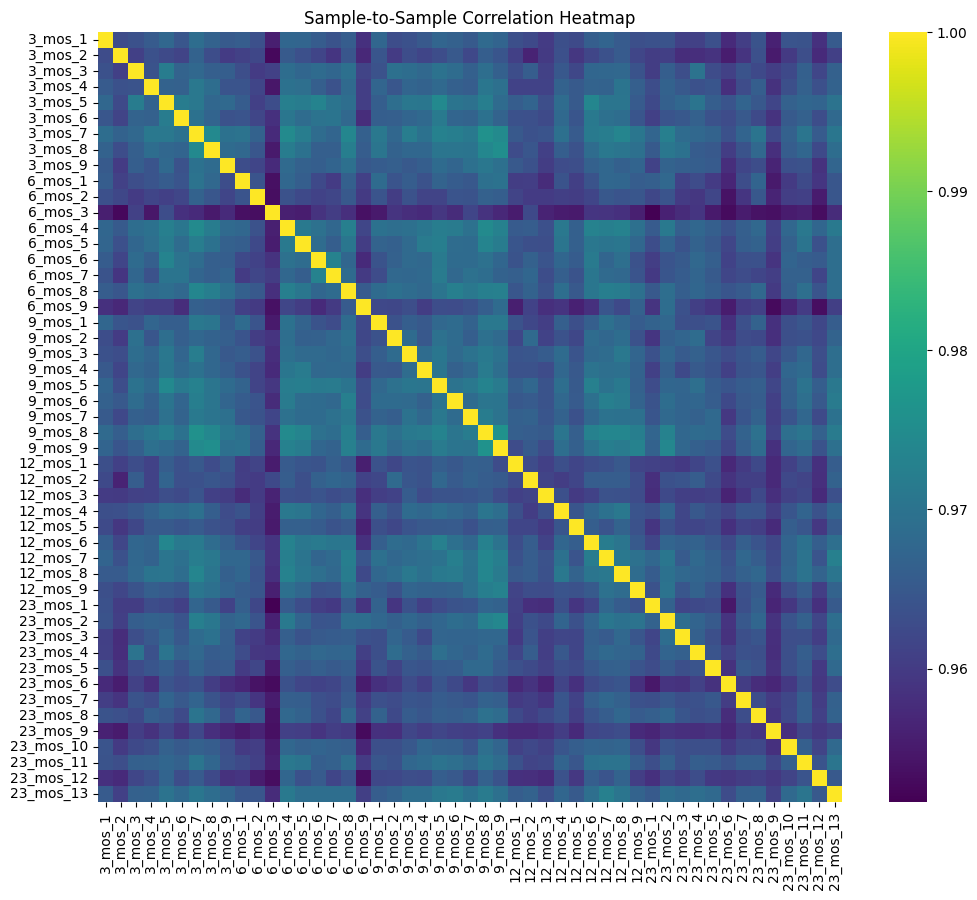

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sample_corr_matrix = df_scaled.corr()

sns.heatmap(sample_corr_matrix, cmap='viridis')
plt.title('Sample-to-Sample Correlation Heatmap')
plt.show()

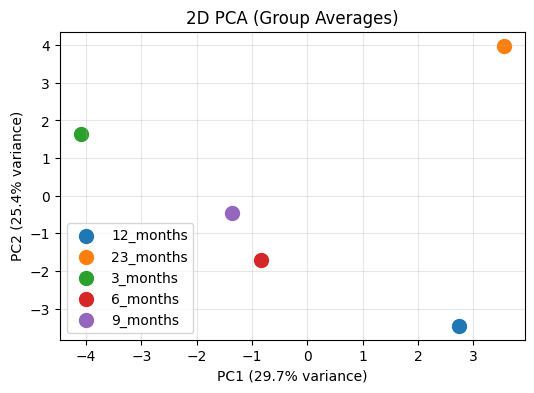

In [14]:
from sklearn.decomposition import PCA
df_T = df_scaled.T

sample_labels = []
for sample in df_T.index:
    if "23_mos" in sample:
        sample_labels.append("23_months")
    elif "12_mos" in sample:
        sample_labels.append("12_months")
    elif "9_mos" in sample:
        sample_labels.append("9_months")
    elif "6_mos" in sample:
        sample_labels.append("6_months")
    elif "3_mos" in sample:
        sample_labels.append("3_months")
    else:
        sample_labels.append("Unknown")

df_T["group"] = sample_labels
df_grouped = df_T.groupby("group", dropna=False).mean(numeric_only=True)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_grouped)

plt.figure(figsize=(6,4))
for i, group in enumerate(df_grouped.index):
    plt.scatter(pca_result[i,0], pca_result[i,1], label=group, s=100)

plt.title("2D PCA (Group Averages)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [15]:
def get_age_samples(age_pattern):
    samples = []
    for col in df_log.columns:
        col_lower = col.lower()

        if age_pattern == '3_mos':
            if col_lower.startswith('3_mos'):
                samples.append(col)
        else:
            if age_pattern in col_lower and f"{age_pattern}" in col_lower:
                samples.append(col)
    return samples

control_samples = get_age_samples('3_mos')
age_6m_samples = get_age_samples('6_mos')
age_9m_samples = get_age_samples('9_mos')
age_12m_samples = get_age_samples('12_mos')
age_23m_samples = get_age_samples('23_mos')

In [16]:
from statsmodels.stats.multitest import multipletests
from scipy.stats import f_oneway

anova_results = []
for gene in df_log.index:
    groups = [
        df_log.loc[gene, control_samples],
        df_log.loc[gene, age_6m_samples],
        df_log.loc[gene, age_9m_samples],
        df_log.loc[gene, age_12m_samples],
        df_log.loc[gene, age_23m_samples]
    ]
    f_stat, anova_p_value = f_oneway(*groups)
    anova_results.append({'gene': gene, 'f_statistic': f_stat, 'anova_p_value': anova_p_value})

anova_df = pd.DataFrame(anova_results)

# Apply FDR correction to ANOVA p-values for all genes
anova_df['anova_p_adjusted'] = multipletests(anova_df['anova_p_value'], method='fdr_bh')[1]
anova_sig = anova_df[anova_df['anova_p_adjusted'] < 0.05]
anova_sig.head()

,gene,f_statistic,anova_p_value,anova_p_adjusted
107,107,10.844921,3.321043e-06,6.913948e-04
122,122,8.462373,3.734495e-05,5.143261e-03
143,143,18.447950,5.769845e-09,3.199335e-06
160,160,29.299914,6.672217e-12,7.466211e-09
179,179,8.440083,3.824676e-05,5.187651e-03


In [17]:
from scipy import stats

pairwise_wide_results = []
for gene in df_log.index:
    control_vals = df_log.loc[gene, control_samples]

    comparisons_data = {'gene': gene}

    for age_name, test_samples in [('6_mos', age_6m_samples),
                                   ('9_mos', age_9m_samples),
                                   ('12_mos', age_12m_samples),
                                   ('23_mos', age_23m_samples)]:

        test_vals = df_log.loc[gene, test_samples]
        t_stat, p_value = stats.ttest_ind(control_vals, test_vals)
        log2_fc = test_vals.mean() - control_vals.mean()

        comparisons_data[f'log2FC_{age_name}'] = log2_fc
        comparisons_data[f'p_value_{age_name}'] = p_value

    pairwise_wide_results.append(comparisons_data)
pairwise_df = pd.DataFrame(pairwise_wide_results)
pairwise_df.head()

,gene,log2FC_6_mos,p_value_6_mos,log2FC_9_mos,p_value_9_mos,log2FC_12_mos,p_value_12_mos,log2FC_23_mos,p_value_23_mos
0,0,0.010151,0.858404,0.052828,0.351704,0.010070,0.824722,0.032891,0.422823
1,1,-0.013091,0.808104,-0.044882,0.318429,0.028278,0.539906,0.005558,0.903467
2,2,-0.024452,0.557960,-0.001463,0.969454,-0.057923,0.074932,-0.017922,0.678152
3,3,0.004194,0.906733,0.020811,0.572029,0.002276,0.944071,-0.027523,0.450102
4,4,-0.015006,0.666493,0.006228,0.878957,-0.021344,0.538754,-0.082010,0.070385


In [18]:
pairwise_df['gene'] = pairwise_df['gene'].astype(str)
df_reset = df.reset_index().rename(columns={'index': 'gene'})
df_reset['gene'] = df_reset['gene'].astype(str)
anova_df['gene'] = anova_df['gene'].astype(str)

# Merge them together
data = pairwise_df.merge(anova_df, on='gene', how='left')
data = data.merge(df_reset, on='gene', how='left')

if 'ID_REF' in data.columns:
    data = data.set_index('ID_REF')
else:
    data = data.set_index('gene')

data = data.drop(columns=['gene'])
data.head()

,log2FC_6_mos,p_value_6_mos,log2FC_9_mos,p_value_9_mos,log2FC_12_mos,p_value_12_mos,log2FC_23_mos,p_value_23_mos,f_statistic,anova_p_value,...,23_mos_4,23_mos_5,23_mos_6,23_mos_7,23_mos_8,23_mos_9,23_mos_10,23_mos_11,23_mos_12,23_mos_13
ID_REF,,,,,,,,,,,,,,,,,,,,,
1367452_at,0.010151,0.858404,0.052828,0.351704,0.010070,0.824722,0.032891,0.422823,0.457616,0.766333,...,3734.2,3511.3,3897.3,3497.9,3560.5,3501.5,3987.9,3935.6,3763.6,3691.0
1367453_at,-0.013091,0.808104,-0.044882,0.318429,0.028278,0.539906,0.005558,0.903467,0.582905,0.676625,...,1643.9,1991.0,1869.7,1738.4,1718.0,1921.1,1994.1,1866.4,1805.9,1948.8
1367454_at,-0.024452,0.557960,-0.001463,0.969454,-0.057923,0.074932,-0.017922,0.678152,0.586324,0.674213,...,1380.1,1360.6,1420.9,1447.4,1355.3,1408.8,1518.0,1556.8,1243.6,1446.7
1367455_at,0.004194,0.906733,0.020811,0.572029,0.002276,0.944071,-0.027523,0.450102,0.599588,0.664884,...,2860.4,2697.0,2609.1,2635.9,2549.4,2377.6,2948.6,2546.2,2810.7,2713.3
1367456_at,-0.015006,0.666493,0.006228,0.878957,-0.021344,0.538754,-0.082010,0.070385,2.158918,0.089422,...,2492.8,2434.7,2587.3,2239.8,2452.5,2108.4,2706.2,2540.6,2738.4,2679.4


In [19]:
for age in ['6_mos', '9_mos', '12_mos', '23_mos']:
    data[f'p_adj_{age}'] = multipletests(data[f'p_value_{age}'], method='fdr_bh')[1]

lfc_threshold = 1
p_threshold = 0.05

sig_6m = data[(abs(data['log2FC_6_mos']) > lfc_threshold) & (data['p_adj_6_mos'] < p_threshold)]
sig_9m = data[(abs(data['log2FC_9_mos']) > lfc_threshold) & (data['p_adj_9_mos'] < p_threshold)]
sig_12m = data[(abs(data['log2FC_12_mos']) > lfc_threshold) & (data['p_adj_12_mos'] < p_threshold)]
sig_23m = data[(abs(data['log2FC_23_mos']) > lfc_threshold) & (data['p_adj_23_mos'] < p_threshold)]

print("6 months:", len(sig_6m))
print("9 months:", len(sig_9m))
print("12 months:", len(sig_12m))
print("23 months:", len(sig_23m))

6 months: 0
9 months: 0
12 months: 0
23 months: 10


/tmp/ipython-input-2075629270.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon=False)


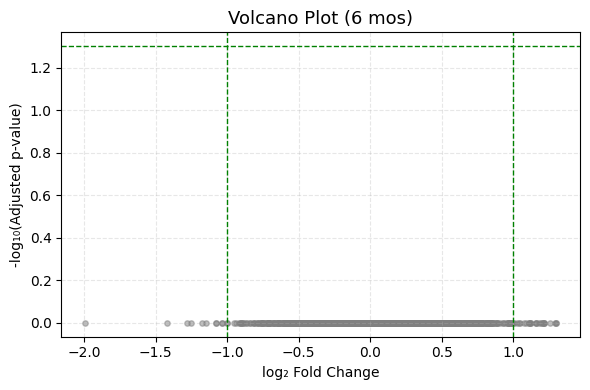

/tmp/ipython-input-2075629270.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon=False)


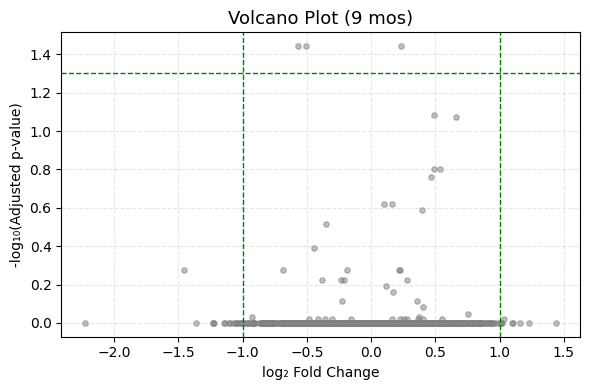

/tmp/ipython-input-2075629270.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon=False)


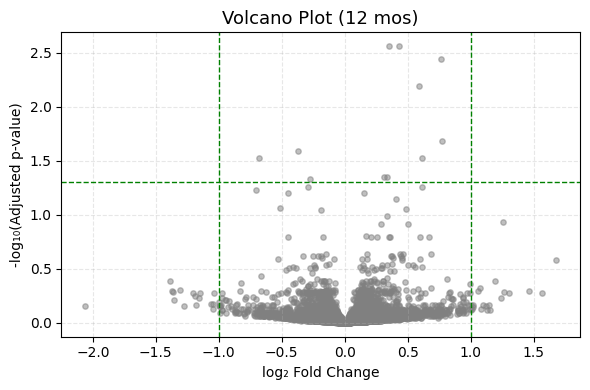

/tmp/ipython-input-2075629270.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(frameon=False)


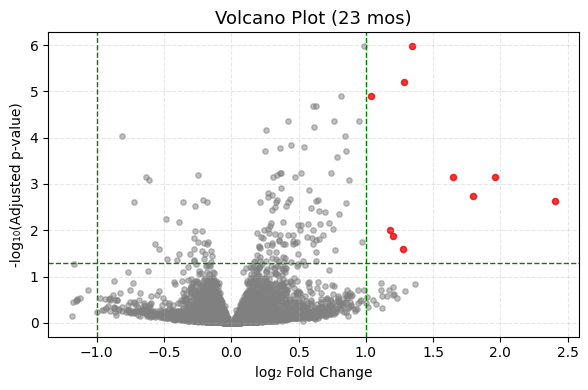

In [20]:
lfc_threshold = 1
p_threshold = 0.05
ages = ['6_mos', '9_mos', '12_mos', '23_mos']

def plot_volcano(df, age):
    lfc_col = f'log2FC_{age}'
    padj_col = f'p_adj_{age}'

    if lfc_col not in df.columns or padj_col not in df.columns:
        print(f"Columns missing for {age}, skipping...")
        return

    df = df.copy()
    df['-log10(padj)'] = -np.log10(df[padj_col].replace(0, np.nan))

    df['significance'] = 'Not significant'
    df.loc[(df[lfc_col] > lfc_threshold) & (df[padj_col] < p_threshold), 'significance'] = 'Upregulated'
    df.loc[(df[lfc_col] < -lfc_threshold) & (df[padj_col] < p_threshold), 'significance'] = 'Downregulated'

    plt.figure(figsize=(6,4))
    plt.scatter(df[lfc_col], df['-log10(padj)'], color='gray', alpha=0.5, s=15)
    plt.scatter(df.loc[df['significance']=='Upregulated', lfc_col],
                df.loc[df['significance']=='Upregulated', '-log10(padj)'],
                color='red', alpha=0.7, s=20)
    plt.scatter(df.loc[df['significance']=='Downregulated', lfc_col],
                df.loc[df['significance']=='Downregulated', '-log10(padj)'],
                color='red', alpha=0.7, s=20)

    plt.axvline(x=lfc_threshold, color='green', linestyle='--', linewidth=1)
    plt.axvline(x=-lfc_threshold, color='green', linestyle='--', linewidth=1)
    plt.axhline(y=-np.log10(p_threshold), color='green', linestyle='--', linewidth=1)

    plt.title(f"Volcano Plot ({age.replace('_', ' ')})", fontsize=13)
    plt.xlabel("log₂ Fold Change")
    plt.ylabel("-log₁₀(Adjusted p-value)")
    plt.legend(frameon=False)
    plt.grid(alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()

for age in ages:
    plot_volcano(data, age)

In [21]:
def get_significant_genes(data, age, lfc_threshold=1, p_threshold=0.05):
    sig = data[
        (abs(data[f'log2FC_{age}']) > lfc_threshold) &
        (data[f'p_adj_{age}'] < p_threshold)
    ]
    print(f"\n🔹 Significant genes at {age.replace('_', ' ')} ({len(sig)} total):")
    if not sig.empty:
        print(sig.index.tolist())
    else:
        print("None found.")
    return sig

sig_12m = get_significant_genes(data, '12_mos')
sig_23m = get_significant_genes(data, '23_mos')

sig_23m[['log2FC_23_mos', 'p_adj_23_mos']].sort_values('p_adj_23_mos').head(13)


🔹 Significant genes at 12 mos (0 total):
None found.

🔹 Significant genes at 23 mos (10 total):
['1367679_at', '1368000_at', '1370493_a_at', '1370822_at', '1370883_at', '1370892_at', '1371033_at', '1371079_at', '1372646_at', '1374251_at']


,log2FC_23_mos,p_adj_23_mos
ID_REF,,
1368000_at,1.344502,0.000001
1371079_at,1.287121,0.000006
1372646_at,1.041705,0.000012
1367679_at,1.646373,0.000693
1370883_at,1.956836,0.000707
1371033_at,1.795478,0.001788
1370822_at,2.403993,0.002337
1370892_at,1.179212,0.009763
1370493_a_at,1.202980,0.013147


In [22]:
gpl = GEOparse.get_GEO("GPL341", destdir=".")

annot = gpl.table[["ID", "Gene Symbol"]].rename(columns={"ID": "ID_REF", "Gene Symbol": "GeneSymbol"})

data_annot = data.merge(annot, on="ID_REF", how="left")
data_annot[["ID_REF", "GeneSymbol"]]

11-Oct-2025 17:06:18 DEBUG utils - Directory . already exists. Skipping.
DEBUG:GEOparse:Directory . already exists. Skipping.
11-Oct-2025 17:06:18 INFO GEOparse - Downloading http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=self&acc=GPL341&form=text&view=full to ./GPL341.txt
INFO:GEOparse:Downloading http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=self&acc=GPL341&form=text&view=full to ./GPL341.txt
11-Oct-2025 17:06:19 DEBUG downloader - Total size: 0
DEBUG:GEOparse:Total size: 0
11-Oct-2025 17:06:19 DEBUG downloader - md5: None
DEBUG:GEOparse:md5: None
27.6MB [00:01, 16.8MB/s]
11-Oct-2025 17:06:21 DEBUG downloader - Moving /tmp/tmpj1g1ogyv to /content/GPL341.txt
DEBUG:GEOparse:Moving /tmp/tmpj1g1ogyv to /content/GPL341.txt
11-Oct-2025 17:06:21 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=self&acc=GPL341&form=text&view=full
DEBUG:GEOparse:Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=self&acc=GPL341&form

,ID_REF,GeneSymbol
0,1367452_at,Sumo2
1,1367453_at,Cdc37
2,1367454_at,Copb2
3,1367455_at,Vcp
4,1367456_at,Ube2d2 /// Ube2d3
...,...,...
8947,1376399_at,NaN
8948,1376400_at,Hic2
8949,1376401_at,Repin1
8950,1376402_a_at,LOC100912246 /// Rasl10b


In [24]:
pip install gseapy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 kB 9.9 MB/s eta 0:00:00


In [25]:
from gseapy import enrichr

gene_list = data_annot.loc[data_annot['p_adj_23_mos'] < 0.05, 'GeneSymbol'].dropna().unique().tolist()

enr = enrichr(
    gene_list=gene_list,
    gene_sets=['GO_Biological_Process_2021'],
    organism='Mouse',
    cutoff=0.05
)
enr.results.head()

print(enr.results[enr.results['Adjusted P-value'] < 0.05].shape)
enr_sorted = enr.results.sort_values(by='Combined Score', ascending=False)

enr_sorted[['Term', 'Adjusted P-value', 'Overlap', 'Genes', 'Combined Score']].head(10)

(41, 10)


,Term,Adjusted P-value,Overlap,Genes,Combined Score
5,negative regulation of leukocyte differentiati...,0.000775,3/5,TMEM176B;TMEM176A;FCGR2B,2718.100430
4,negative regulation of dendritic cell differen...,0.000775,3/5,TMEM176B;TMEM176A;FCGR2B,2718.100430
28,erythrose 4-phosphate/phosphoenolpyruvate fami...,0.022209,2/5,QDPR;FAH,726.424086
29,L-phenylalanine catabolic process (GO:0006559),0.022209,2/5,QDPR;FAH,726.424086
12,immunoglobulin mediated immune response (GO:00...,0.004180,3/10,CD74;FCER1G;FCGR2B,624.800719
13,B cell mediated immunity (GO:0019724),0.005310,3/11,CD74;FCER1G;FCGR2B,529.773920
32,tyrosine catabolic process (GO:0006572),0.030145,2/6,FAH;HPD,516.162936
31,hydrogen peroxide biosynthetic process (GO:005...,0.030145,2/6,MAOB;CYBA,516.162936
15,regulation of dendritic cell differentiation (...,0.006149,3/12,TMEM176B;TMEM176A;FCGR2B,457.341046
3,regulation of cation transmembrane transport (...,0.000686,5/30,CD63;HOMER1;WNK1;KCNIP4;KCNAB1,382.669858


/tmp/ipython-input-638808251.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Term', x='Combined Score', palette='viridis',


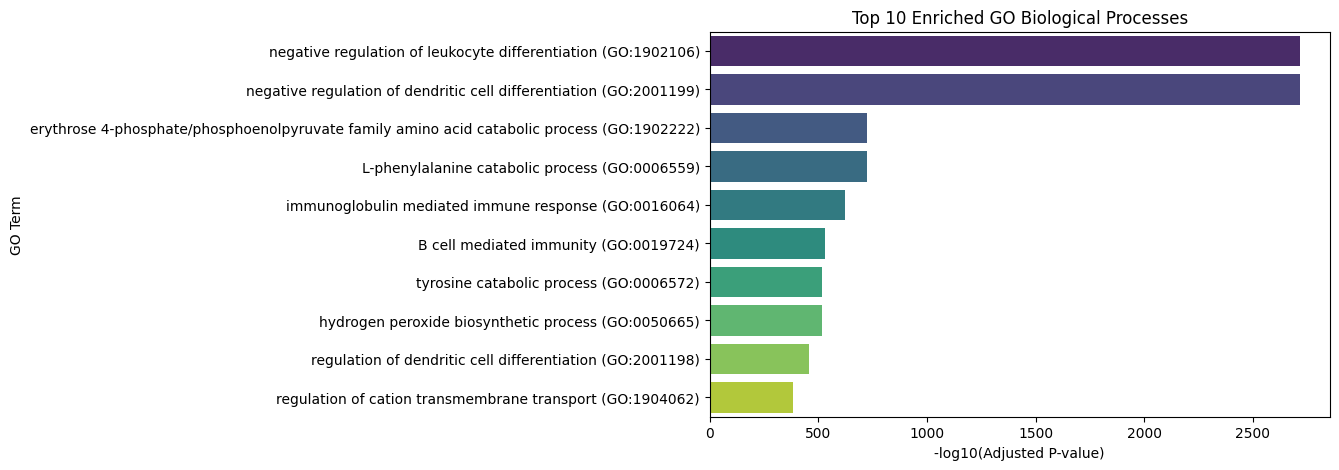

In [26]:
top_terms = enr_sorted.head(10)
plt.figure(figsize=(8, 5))
sns.barplot(y='Term', x='Combined Score', palette='viridis',
            data=top_terms.assign(**{'-log10(Adjusted P-value)': -np.log10(top_terms['Adjusted P-value'])}))
plt.title('Top 10 Enriched GO Biological Processes')
plt.xlabel('-log10(Adjusted P-value)')
plt.ylabel('GO Term')
plt.show()

In [27]:
gene_list_23m = data_annot.loc[data_annot['p_adj_23_mos'] < 0.05, 'GeneSymbol'].dropna().unique().tolist()

# KEGG enrichment
kegg_enr = enrichr(
    gene_list=gene_list_23m,
    gene_sets=['KEGG_2021_Human'],
    organism='Human',
    cutoff=0.05
)

kegg_sorted = kegg_enr.results.sort_values(by='Combined Score', ascending=False)
kegg_sorted[['Term','Adjusted P-value','Overlap','Genes','Combined Score']].head(7)

,Term,Adjusted P-value,Overlap,Genes,Combined Score
0,Lysosome,1.684316e-08,12/128,CD63;FUCA1;HEXB;LAMP2;CTSZ;LAPTM5;AP3S1;AGA;CT...,362.929248
2,Other glycan degradation,1.285840e-02,3/18,FUCA1;HEXB;AGA,237.516149
9,Phenylalanine metabolism,9.517988e-02,2/17,MAOB;HPD,96.569986
18,Caffeine metabolism,3.172237e-01,1/6,XDH,90.207076
1,Antigen processing and presentation,1.285840e-02,5/78,CD74;PSME1;B2M;CTSB;LGMN,83.630368
6,Tyrosine metabolism,4.485117e-02,3/36,MAOB;FAH;HPD,80.745578
3,Complement and coagulation cascades,1.285840e-02,5/85,C1QB;C3;VTN;F2R;SERPING1,72.638236


/tmp/ipython-input-1854083048.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


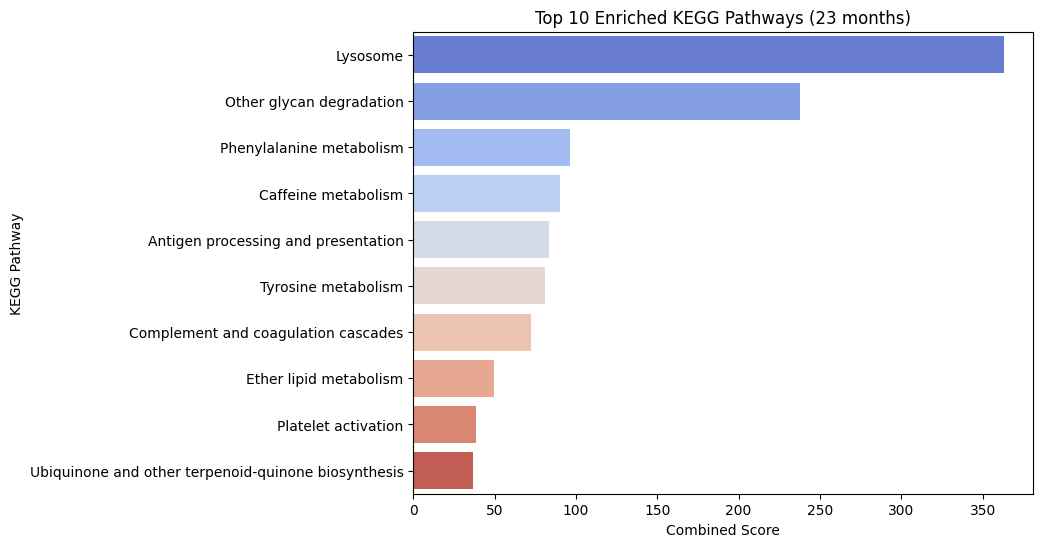

In [28]:
kegg_top = kegg_sorted.head(10)

plt.figure(figsize=(8,6))
sns.barplot(
    x='Combined Score',
    y='Term',
    data=kegg_top,
    palette='coolwarm'
)
plt.xlabel("Combined Score")
plt.ylabel("KEGG Pathway")
plt.title("Top 10 Enriched KEGG Pathways (23 months)")
plt.show()

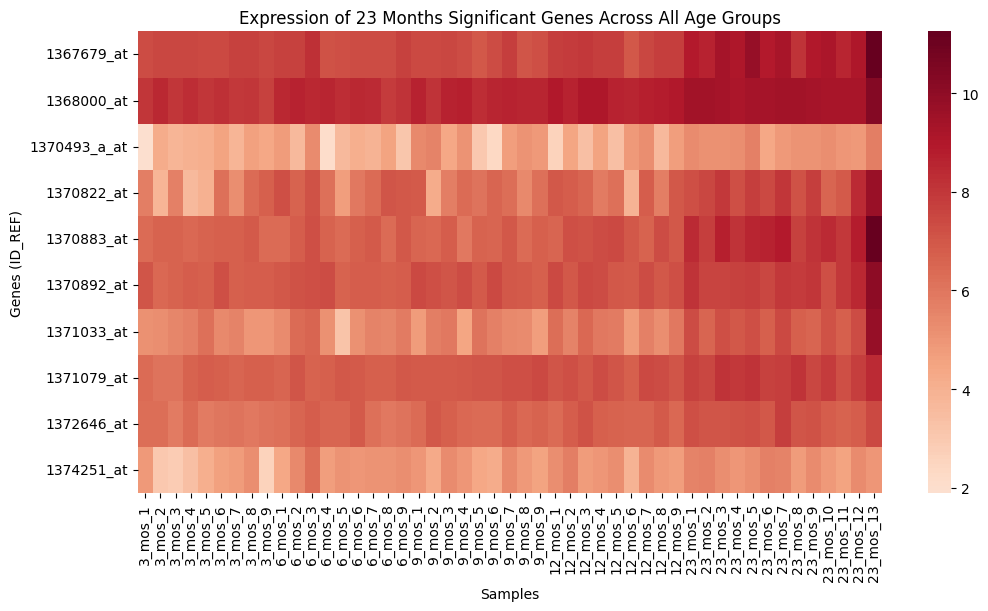

In [29]:
sig_genes_23 = sig_23m.index.tolist()

heatmap_data = df[df['ID_REF'].isin(sig_genes_23)].copy()
heatmap_data.set_index('ID_REF', inplace=True)

expr_cols = [col for col in heatmap_data.columns if col not in ['IDENTIFIER']]
heatmap_data = heatmap_data[expr_cols]

heatmap_data_log2 = np.log2(heatmap_data + 1)
age_order = control_samples + age_6m_samples + age_9m_samples + age_12m_samples + age_23m_samples
heatmap_data_log2 = heatmap_data_log2[age_order]

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data_log2, cmap="RdBu_r", center=0, annot=False)
plt.title("Expression of 23 Months Significant Genes Across All Age Groups")
plt.xlabel("Samples")
plt.ylabel("Genes (ID_REF)")
plt.show()

In [30]:
gds_table.columns

Index(['ID_REF', 'IDENTIFIER', 'GSM252510', 'GSM252511', 'GSM252512',
       'GSM252513', 'GSM252514', 'GSM252515', 'GSM252516', 'GSM252517',
       'GSM252518', 'GSM252519', 'GSM252520', 'GSM252521', 'GSM252522',
       'GSM252523', 'GSM252524', 'GSM252525', 'GSM252526', 'GSM252527',
       'GSM252528', 'GSM252529', 'GSM252530', 'GSM252531', 'GSM252532',
       'GSM252533', 'GSM252534', 'GSM252535', 'GSM252536', 'GSM252537',
       'GSM252538', 'GSM252539', 'GSM252540', 'GSM252541', 'GSM252542',
       'GSM252543', 'GSM252544', 'GSM252545', 'GSM252546', 'GSM252547',
       'GSM252548', 'GSM252549', 'GSM252550', 'GSM252551', 'GSM252552',
       'GSM252553', 'GSM252554', 'GSM252555', 'GSM252556', 'GSM252557',
       'GSM252558', 'Gene title', 'Gene symbol', 'Gene ID', 'UniGene title',
       'UniGene symbol', 'UniGene ID', 'Nucleotide Title', 'GI',
       'GenBank Accession', 'Platform_CLONEID', 'Platform_ORF',
       'Platform_SPOTID', 'Chromosome location', 'Chromosome annotation',
  

In [31]:
significant_ids = ['1367679_at', '1368000_at', '1370493_a_at', '1370822_at', '1370883_at', '1370892_at', '1371033_at', '1371079_at', '1372646_at',
                    '1374251_at', '1384547_at', '1386879_at', '1387992_at', '1386770_x_at']
significant_genes_info = gds_table[gds_table['ID_REF'].isin(significant_ids)]

common_columns = ['ID_REF', 'Gene symbol', 'Gene ID', 'Gene title', 'GI']
available_columns = [col for col in common_columns if col in gds_table.columns]
print(f"Available columns: {available_columns}")

significant_genes_info = gds_table[gds_table['ID_REF'].isin(significant_ids)][available_columns]

# Display the results
print(f"\nSignificant Genes Information ({len(significant_genes_info)} genes):")
significant_genes_info

Available columns: ['ID_REF', 'Gene symbol', 'Gene ID', 'Gene title', 'GI']

Significant Genes Information (10 genes):


,ID_REF,Gene symbol,Gene ID,Gene title,GI
227,1367679_at,Cd74,25599,CD74 molecule,78126178.0
548,1368000_at,C3,24232,complement component 3,158138560.0
3041,1370493_a_at,Lilra3///Lilrb1///Lilrb3b///LOC690948///Lilrb3...,100912499///100912456///690955///690948///6834...,"leukocyte immunoglobulin-like receptor, subfam...",5758942.0
3370,1370822_at,RT1-Ba,309621,"RT1 class II, locus Ba",18369834.0
3431,1370883_at,RT1-Da,294269,"RT1 class II, locus Da",57163.0
3440,1370892_at,LOC100911579///C4b///C4a,100911579///406161///24233,complement C4-like///complement component 4B (...,14938889.0
3581,1371033_at,LOC688090///RT1-Bb,688090///309622,similar to RT1 class II histocompatibility ant...,5032455.0
3627,1371079_at,Fcgr2b,289211,"Fc fragment of IgG, low affinity IIb, receptor",397576.0
5194,1372646_at,RGD1305645,363225,similar to RIKEN cDNA 1500015O10,11406638.0
6799,1374251_at,Kcnj15,170847,potassium voltage-gated channel subfamily J me...,4132258.0
